In [27]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from matplotlib import cm
from matplotlib import pyplot
import matplotlib as plt
from matplotlib.mlab import griddata
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate as inter

In [28]:
featuresExplained = pd.read_csv("labels.csv")
CountyData = pd.read_csv("county data.csv")
VotingData = pd.read_csv("lineardata.csv")
FutureData = pd.read_csv("clintondata.csv")

Features = ['fips', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214',
'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213',
'EDU685213', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213', 'HSG495213', 'HSD410213',
'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'SBO001207', 'LND110210', 'POP060210']


S = CountyData.iloc[:,1:27].values
t = VotingData.values
future = FutureData.values

sc_S = preprocessing.StandardScaler()
sc_t = preprocessing.StandardScaler()
sc_2020 = preprocessing.StandardScaler()

S2 = sc_S.fit_transform(S)
t2 = sc_t.fit_transform(t)
futureElection = sc_2020.fit_transform(future)

#support vector regression
# clf = SVR(kernel='poly', degree=3, verbose=True) #gamma='auto'
clf = SVR(kernel='linear')
y_pred = clf.fit(S2, t2.ravel())
zp = sc_t.inverse_transform(clf.predict(sc_S.transform(S))) #the predictions
new = sc_2020.inverse_transform(clf.predict(sc_S.transform(S))) #the predictions


In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

S2 = np.array(S2)
t2 = np.array(t2)
S = np.array(S)
t = np.array(t)

y_rbf = svr_rbf.fit(S2, t2.ravel())
y_lin = svr_lin.fit(S2, t2.ravel())
y_poly = svr_poly.fit(S2, t2.ravel())

rbf = sc_t.inverse_transform(y_rbf.predict(sc_S.transform(S)))
lin = sc_t.inverse_transform(y_lin.predict(sc_S.transform(S)))
poly = sc_t.inverse_transform(y_poly.predict(sc_S.transform(S)))

print(rbf)

[0.36561144 0.55560647 0.29616103 0.47111929 0.23133745 0.47862365
 0.33657196 0.35764302 0.48882351 0.33001862 0.41246252 0.35494341
 0.44481263 0.4786719  0.48148971 0.32154819 0.33697416 0.42380276
 0.41805575 0.38278482 0.41075807 0.51282759 0.59320957 0.42184677
 0.5670049  0.44236748 0.39817992 0.31190949 0.2217961  0.39459128
 0.31687133 0.40199808 0.2764497  0.27799021 0.62048208 0.40733959
 0.43812846 0.36370463 0.52075693 0.52776807 0.33762033 0.36113025
 0.4694557  0.26062044 0.55289341 0.55561191 0.39936391 0.50565647
 0.39100595 0.3085179  0.84144708 0.44891303 0.27336049 0.414427
 0.3230765  0.28887289 0.3611701  0.37350827 0.32776723 0.38537816
 0.34868368 0.40027954 0.41663108 0.39897432 0.38646356 0.41829328
 0.38108476]


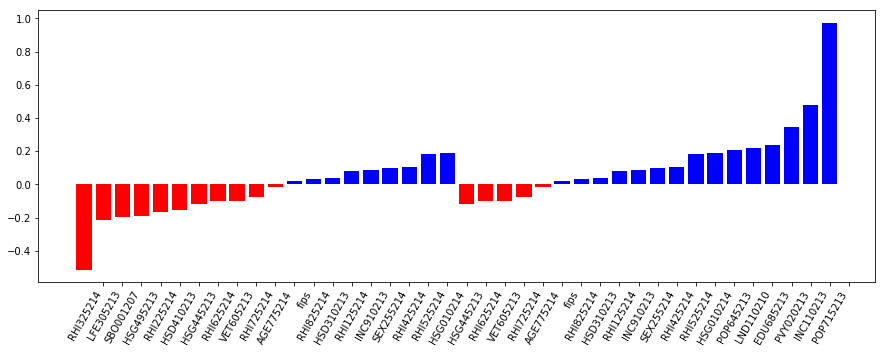

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()


plot_coefficients(clf, Features)